<a href="https://colab.research.google.com/github/tejaswini309/task_1-Titanic_survival_prediction/blob/main/Task_01_ipynb(Titanic_survival_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Author:Tejaswini Avula
Batch: November
Domain: Data Science
Aim:Titanic survival prediction



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
file_path = r"C:\Users\tejaswini avula\Downloads\titanic\train.csv"
train_data = pd.read_csv(file_path)

In [ ]:
print("\nDataset Information:")
print(train_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


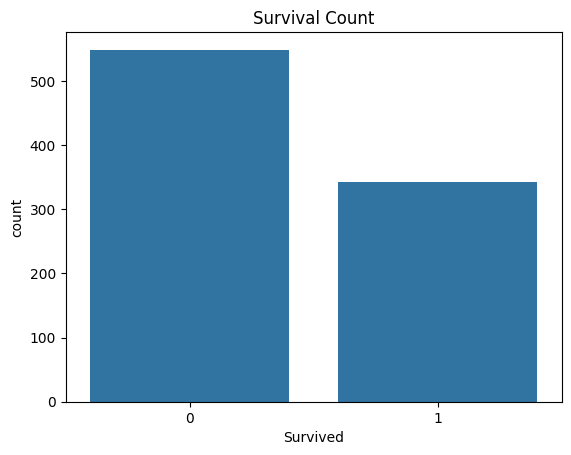

In [ ]:
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Count')
plt.show()


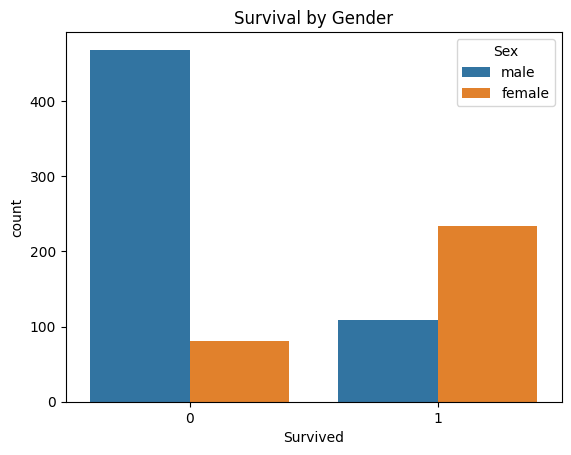

In [ ]:
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()

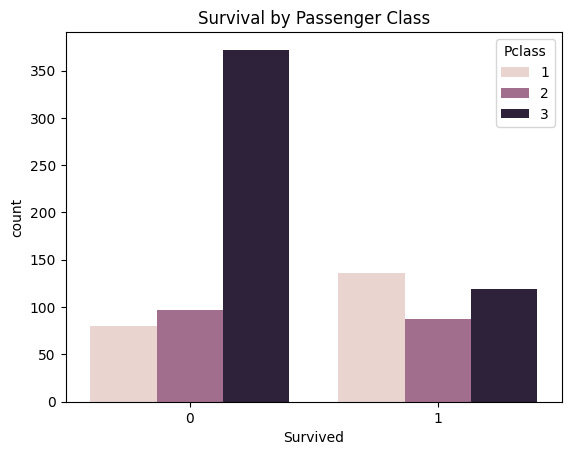

In [ ]:
sns.countplot(data=train_data, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.show()


In [ ]:

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())


In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [ ]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [ ]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")



Training Accuracy: 0.98


In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTesting Accuracy: {test_accuracy:.2f}")



Testing Accuracy: 0.82


In [ ]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))



Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix for Test Data:
[[91 14]
 [18 56]]


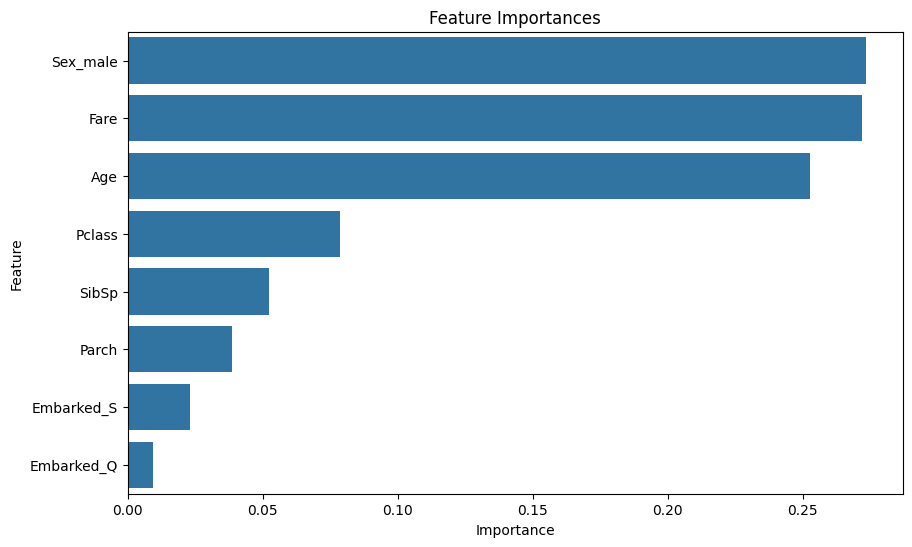

In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
file_path_test = r"C:\Users\tejaswini avula\Downloads\titanic\test.csv"
test_data = pd.read_csv(file_path_test)


In [ ]:

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Ensure the columns exist before creating dummies
if 'Sex' in test_data.columns:
    test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)
else:
    test_data['Sex_male'] = 0

if 'Embarked' in test_data.columns:
    test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)
else:
    test_data['Embarked_Q'] = 0
    test_data['Embarked_S'] = 0

# Add missing columns to match training data
required_columns = set(['Sex_male', 'Embarked_Q', 'Embarked_S'])
missing_cols = required_columns - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0


In [ ]:
# Align the columns of the test data with training data
test_data = test_data.reindex(columns=X.columns, fill_value=0)

# Standardize the test data
test_data_scaled = scaler.transform(test_data)

# Predict on the final test data
final_predictions = model.predict(test_data_scaled)
print("\nFinal Test Predictions:")
print(final_predictions)




Final Test Predictions:
[1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
